In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [15]:
# Load CSV
file_path = "sample_patients.csv"   # change if needed
df = pd.read_csv(file_path)

# Show columns
print("Columns:", df.columns.tolist())
df.head()


Columns: ['PatientID', 'Age', 'Gender', 'Weight', 'Height', 'BloodType', 'ThalassemiaType', 'LastTransfusionDate', 'HemoglobinLevel', 'AvgHemoglobinLast3', 'TransfusionIntervalDays', 'TransfusionVolume', 'IronLevel', 'FerritinLevel', 'FatigueLevel', 'WeaknessLevel', 'HeadacheLevel', 'SymptomHistory30d', 'DailyActivityScore30d', 'DietCompliance', 'StressLevel', 'ChelationTherapyType', 'MedicationAdherence', 'MedicationSideEffects', 'SleepQuality', 'HydrationLevel', 'PredictedHemoglobinNext', 'NextTransfusionDatePredicted', 'AIConfidence (%)', 'RiskScore', 'HealthTipsGenerated', 'ActivityLevel', 'DigitalTwinID', 'Notes']


,PatientID,Age,Gender,Weight,Height,BloodType,ThalassemiaType,LastTransfusionDate,HemoglobinLevel,AvgHemoglobinLast3,...,SleepQuality,HydrationLevel,PredictedHemoglobinNext,NextTransfusionDatePredicted,AIConfidence (%),RiskScore,HealthTipsGenerated,ActivityLevel,DigitalTwinID,Notes
0,P001,12,M,35,140,A+,Beta,2025-08-15,7.8,8.0,...,8,Medium,8.5,2025-09-05,88,15,Increase hydration; Maintain diet,Medium,P001,Regular chelation therapy
1,P002,8,F,25,120,B-,Beta,2025-08-12,6.9,7.2,...,6,Low,7.5,2025-09-01,82,20,Focus on sleep; Monitor fatigue,Low,P002,Occasional missed doses
2,P003,15,M,45,150,O+,Beta,2025-08-18,8.2,8.0,...,9,High,8.8,2025-09-12,90,10,Maintain activity; Continue therapy,High,P003,"Good adherence, active lifestyle"
3,P004,10,F,30,130,AB-,Beta,2025-08-10,7.0,7.1,...,7,Medium,7.6,2025-09-02,85,18,Improve diet; Hydration tips,Medium,P004,Needs follow-up on diet
4,P005,13,M,40,145,A-,Beta,2025-08-17,7.5,7.8,...,8,Medium,8.2,2025-09-07,87,14,Monitor activity; Continue medication,Medium,P005,"Stable, regular check-ups"


In [16]:
# Pick the first patient
patient_id = df["PatientID"].iloc[0]
patient_df = df[df["PatientID"] == patient_id].iloc[0]

print("Selected Patient:", patient_id)
patient_df


Selected Patient: P001


PatientID                                                                    P001
Age                                                                            12
Gender                                                                          M
Weight                                                                         35
Height                                                                        140
BloodType                                                                      A+
ThalassemiaType                                                              Beta
LastTransfusionDate                                                    2025-08-15
HemoglobinLevel                                                               7.8
AvgHemoglobinLast3                                                            8.0
TransfusionIntervalDays                                                        21
TransfusionVolume                                                             350
IronLevel       

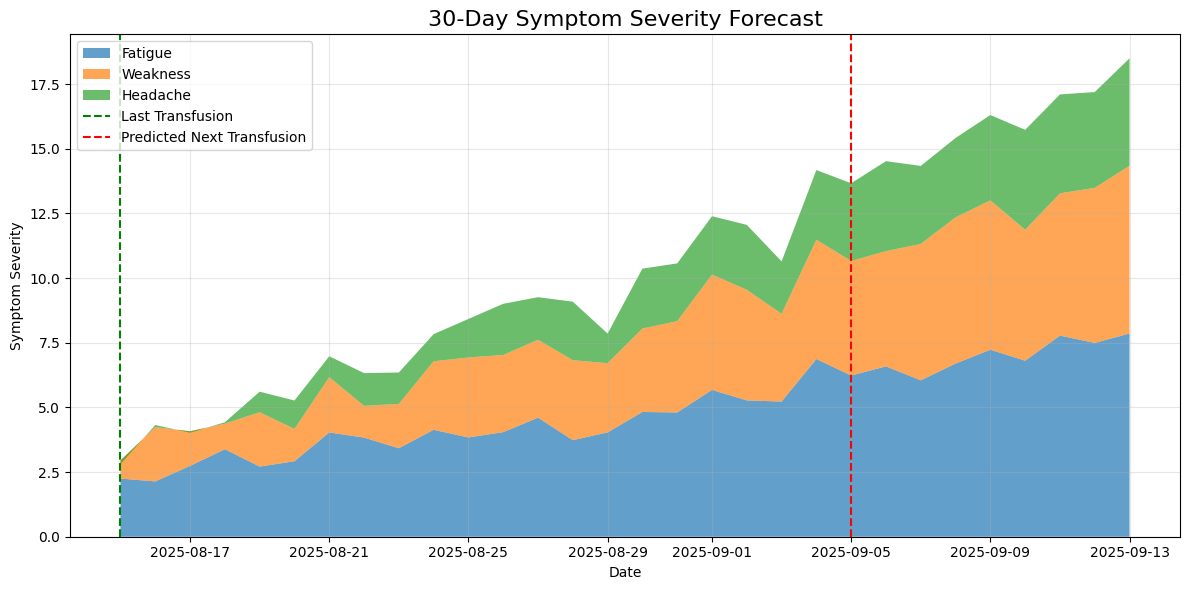

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

patient_df = pd.read_csv("sample_patients.csv")

patient_df["LastTransfusionDate"] = pd.to_datetime(patient_df["LastTransfusionDate"])
patient_df["NextTransfusionDatePredicted"] = pd.to_datetime(patient_df["NextTransfusionDatePredicted"])

last_transfusion = patient_df["LastTransfusionDate"].iloc[0]
next_predicted = patient_df["NextTransfusionDatePredicted"].iloc[0]


timeline = pd.date_range(start=last_transfusion, periods=30, freq="D")


np.random.seed(42)
fatigue = np.linspace(2, 8, len(timeline)) + np.random.normal(0, 0.5, len(timeline))
weakness = np.linspace(1, 6, len(timeline)) + np.random.normal(0, 0.5, len(timeline))
headache = np.linspace(0, 4, len(timeline)) + np.random.normal(0, 0.3, len(timeline))


plt.figure(figsize=(12,6))
plt.stackplot(timeline, fatigue, weakness, headache, labels=["Fatigue", "Weakness", "Headache"], alpha=0.7)

# Mark transfusion points
plt.axvline(x=last_transfusion, color="green", linestyle="--", label="Last Transfusion")
plt.axvline(x=next_predicted, color="red", linestyle="--", label="Predicted Next Transfusion")

# Labels & legend
plt.title("30-Day Symptom Severity Forecast", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Symptom Severity")
plt.legend(loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


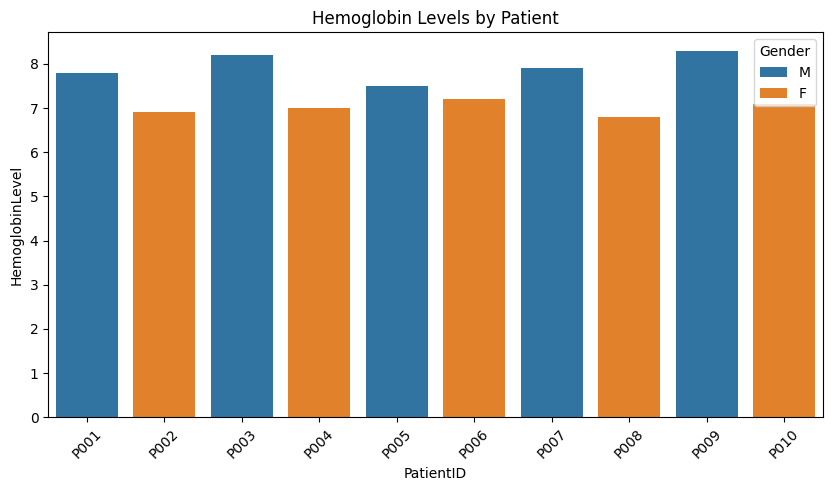

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="PatientID", y="HemoglobinLevel", hue="Gender")
plt.title("Hemoglobin Levels by Patient")
plt.xticks(rotation=45)
plt.show()


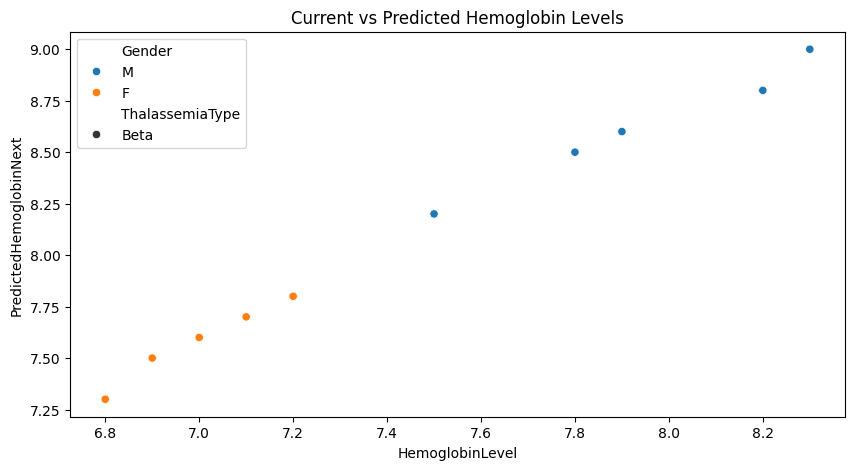

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="HemoglobinLevel", y="PredictedHemoglobinNext", hue="Gender", style="ThalassemiaType")
plt.title("Current vs Predicted Hemoglobin Levels")
plt.show()


<Figure size 1200x600 with 0 Axes>

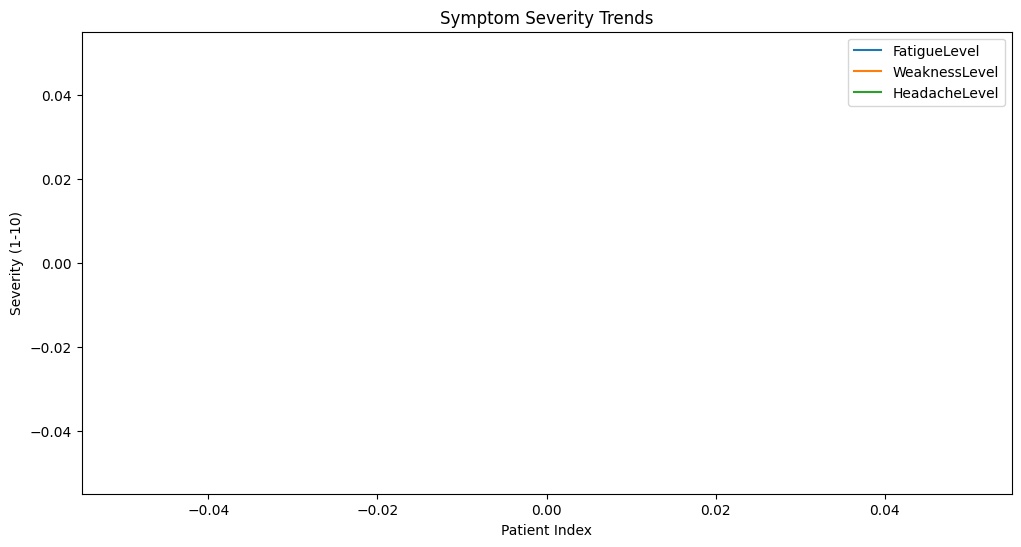

In [9]:
import matplotlib.pyplot as plt

# Ensure the symptom columns are numeric
symptoms = ["FatigueLevel", "WeaknessLevel", "HeadacheLevel"]
df[symptoms] = df[symptoms].apply(pd.to_numeric, errors="coerce")

# Plot
plt.figure(figsize=(12,6))
df[symptoms].plot(kind="line", figsize=(12,6))
plt.title("Symptom Severity Trends")
plt.xlabel("Patient Index")
plt.ylabel("Severity (1-10)")
plt.legend(symptoms)
plt.show()
